In [1]:
import utilities as util
import models
import pandas as pd
import torch
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Epoch: 0 | Loss: 0.04412
Epoch: 1 | Loss: 0.03267
Epoch: 2 | Loss: 0.03073
Epoch: 3 | Loss: 0.0229
Epoch: 4 | Loss: 0.02105
Epoch: 5 | Loss: 0.02023
Epoch: 6 | Loss: 0.01729
Epoch: 7 | Loss: 0.01626
Time [min]: 2.6


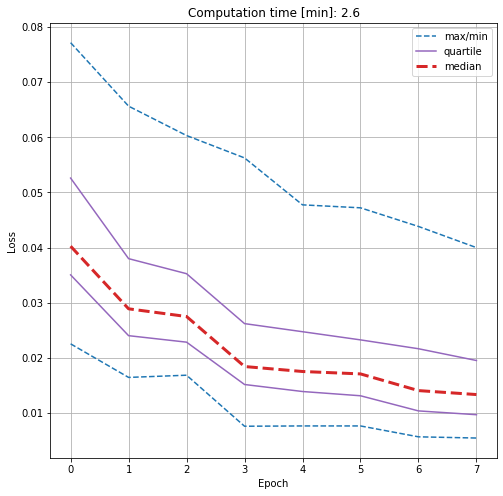

In [8]:
params = {'name': 'gradient_norm',
          'path2data': '../data/ID02_1h.mat',
          # model parameters ------------------------
          'channel_size': 60,
          'hidden_size': 60,
          'lambda': 0.5,
          'nonlinearity': 'tanh',
          'bias': False,
          # train parameters -------------------------
          'sample_size': 2000,
          'window_size': 50,
          'normalization': True,
          'epochs': 8,
          'lr_decay': 3}

step_loss, grad_norm = util.train(params)

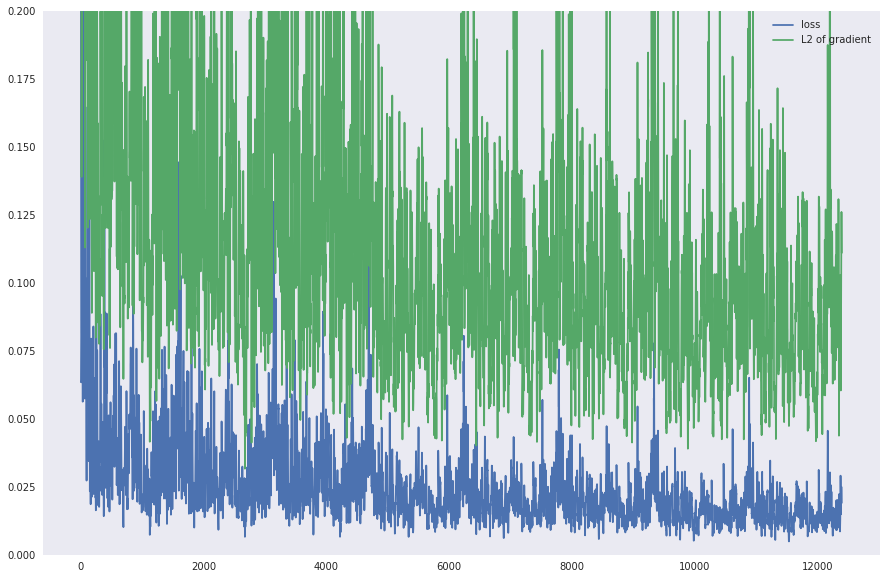

In [24]:
plt.figure(figsize=(15,10))
plt.plot(step_loss, label='loss')
plt.plot(grad_norm, label='L2 of gradient')
plt.legend()
plt.grid()
plt.ylim(0, 0.2)
plt.savefig('step_loss.png')
plt.show()

In [28]:
sns.set()

fmri = sns.load_dataset("fmri")
print(fmri.head())
#ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970


In [10]:
model = models.FRNN(params)
model.load_state_dict(torch.load('../models/' + params['name'] + '.pth'))

<All keys matched successfully>

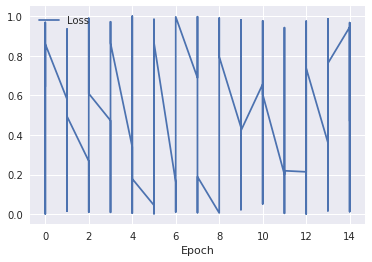

In [4]:
import seaborn as sns

epochs = 15
ch = 60
loss = np.random.rand(epochs, ch)
grad = np.random.rand(epochs)


m = np.zeros((4, epochs*ch))
m[0, :] = np.repeat(np.arange(0, epochs), ch)
m[1, :] = np.tile(np.arange(0, ch), epochs)
m[2, :] = loss.reshape(1, -1)
m[3, :] = np.repeat(grad, ch)

df = pd.DataFrame(m.T, columns=['Epoch', 'Channel', 'Loss', 'Grad Norm'])


ax = df.plot(x='Epoch', y='Loss')

In [5]:
np.repeat(np.arange(0, epochs, dtype=int), ch)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3